<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week_6_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Clustering Dataset Online Retail

## 1. Pendahuluan
Pada notebook ini, kita akan melakukan analisis clustering pada dataset Online Retail menggunakan dua metode clustering yang berbeda. Kita akan mengevaluasi performa clustering menggunakan berbagai metrik evaluasi dan membandingkan hasilnya.

### Dataset
Dataset yang digunakan adalah Online Retail.xlsx yang berisi data transaksi retail online.

### Metode Clustering yang Digunakan
1. K-Means Clustering
2. Hierarchical Clustering (Agglomerative)

### Metrik Evaluasi
- Elbow Method
- Silhouette Coefficient
- Calinski-Harabasz Index
- Davies-Bouldin Index
- Dunn Index

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

# Set style untuk visualisasi
plt.style.use('ggplot')  # Or 'seaborn-whitegrid', 'seaborn-darkgrid', etc.
# Check available styles using: print(plt.style.available)
sns.set_palette('husl')

# Import data
df = pd.read_excel('Online Retail.xlsx')

# Tampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\n5 baris pertama dataset:")
print(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

5 baris pertama dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HE

In [ ]:
# Pengecekan missing values
print("Missing Values:")
print(df.isnull().sum())

# Menghapus missing values
df = df.dropna()

# Membuat fitur baru
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agregasi data per customer
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',  # Jumlah transaksi
    'TotalPrice': 'sum',   # Total pengeluaran
    'Quantity': 'sum'      # Total kuantitas
}).reset_index()

# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['InvoiceNo', 'TotalPrice', 'Quantity']])
scaled_df = pd.DataFrame(scaled_data, columns=['InvoiceNo', 'TotalPrice', 'Quantity'])

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<ipython-input-5-4373f650a975>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


## 4. K-Means Clustering
Pada bagian ini, kita akan mengimplementasikan K-Means Clustering dengan menentukan jumlah cluster optimal menggunakan Elbow Method.

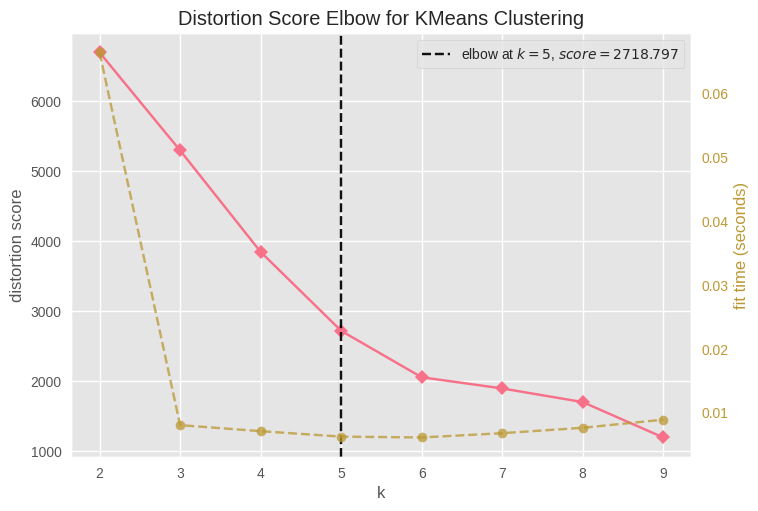

In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()

# Implementasi K-Means dengan jumlah cluster optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Menambahkan label cluster ke dataset
customer_data['KMeans_Cluster'] = kmeans_labels

## 5. Hierarchical Clustering
Pada bagian ini, kita akan mengimplementasikan Hierarchical Clustering dengan visualisasi dendrogram untuk melihat struktur hierarki data.

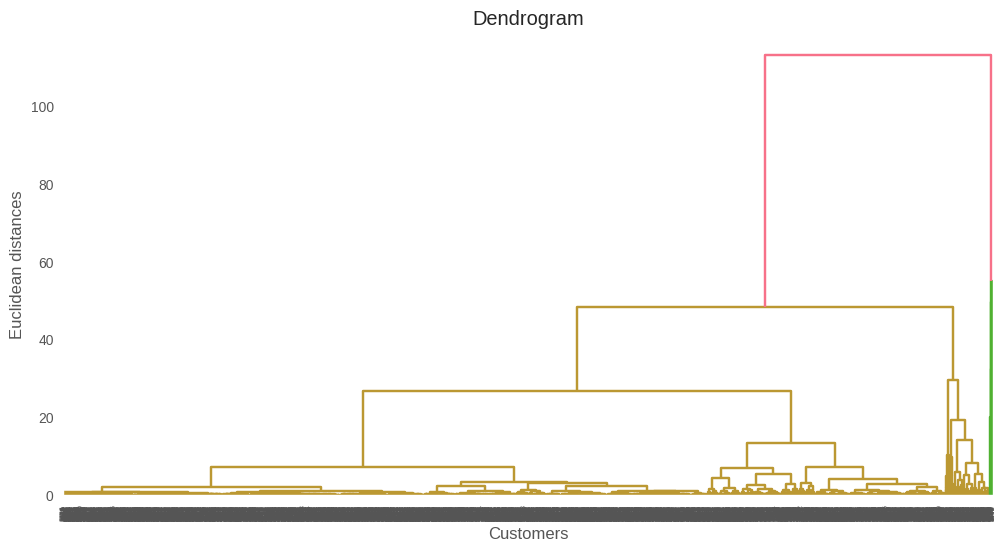

In [ ]:
# Membuat dendrogram
plt.figure(figsize=(12, 6))
dend = dendrogram(linkage(scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Implementasi Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)

# Menambahkan label cluster ke dataset
customer_data['Hierarchical_Cluster'] = hierarchical_labels

## 6. Evaluasi Clustering
Pada bagian ini, kita akan mengevaluasi performa kedua metode clustering menggunakan berbagai metrik evaluasi.

In [ ]:
def evaluate_clustering(data, labels):
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)

    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski:.4f}")
    print(f"Davies-Bouldin Index: {davies:.4f}")

    return {
        'Silhouette': silhouette,
        'Calinski': calinski,
        'Davies': davies
    }

print("Evaluasi K-Means Clustering:")
kmeans_metrics = evaluate_clustering(scaled_df, kmeans_labels)

print("\nEvaluasi Hierarchical Clustering:")
hierarchical_metrics = evaluate_clustering(scaled_df, hierarchical_labels)

Evaluasi K-Means Clustering:
Silhouette Score: 0.7530
Calinski-Harabasz Index: 4154.6639
Davies-Bouldin Index: 0.7267

Evaluasi Hierarchical Clustering:
Silhouette Score: 0.8102
Calinski-Harabasz Index: 4069.9393
Davies-Bouldin Index: 0.6662


## 7. Visualisasi Hasil Clustering
Pada bagian ini, kita akan memvisualisasikan hasil clustering dari kedua metode untuk melihat pola dan karakteristik setiap cluster.

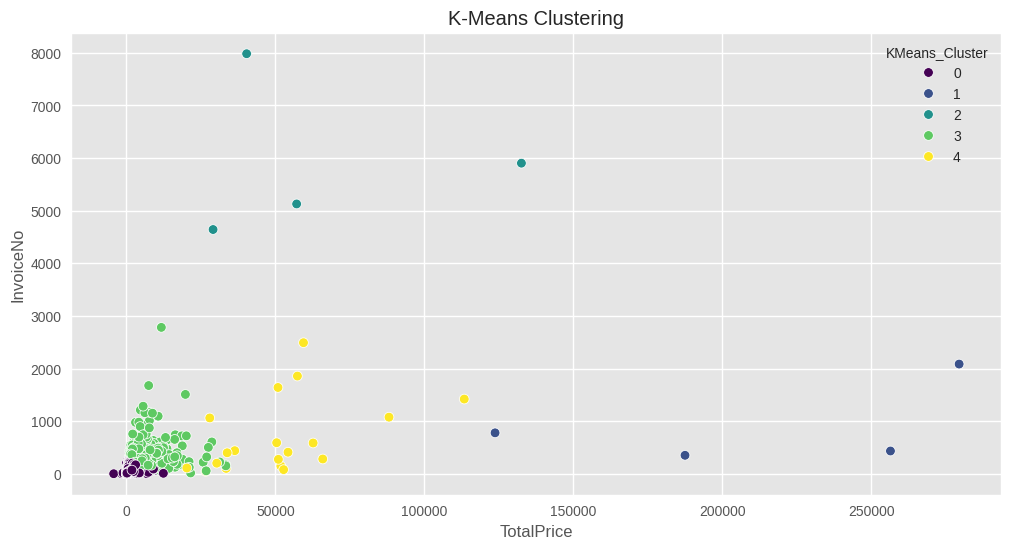

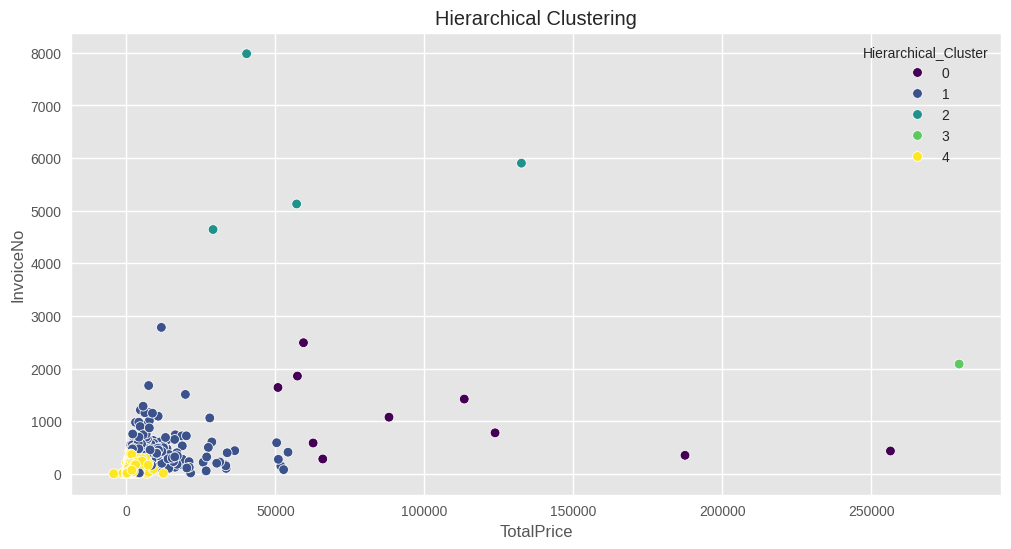

In [ ]:
# Visualisasi K-Means Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='TotalPrice', y='InvoiceNo',
                hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualisasi Hierarchical Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='TotalPrice', y='InvoiceNo',
                hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

## 8. Analisis dan Interpretasi Hasil

### Penjelasan Metrik Evaluasi

1. **Elbow Method**
   - Metode ini digunakan untuk menentukan jumlah cluster optimal
   - Mencari titik di mana penurunan inersia (within-cluster sum of squares) mulai melambat
   - Rumus: $WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$
   - Dimana:
     - $k$ = jumlah cluster
     - $C_i$ = cluster ke-i
     - $\mu_i$ = centroid cluster ke-i
     - $x$ = data point

2. **Silhouette Coefficient**
   - Mengukur seberapa baik suatu objek berada dalam clusternya
   - Rentang nilai: -1 hingga 1
   - Rumus: $s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$
   - Dimana:
     - $a(i)$ = rata-rata jarak ke semua titik dalam cluster yang sama
     - $b(i)$ = rata-rata jarak ke semua titik dalam cluster terdekat

3. **Calinski-Harabasz Index**
   - Mengukur rasio antara dispersi antar cluster dan dispersi dalam cluster
   - Semakin tinggi nilainya, semakin baik
   - Rumus: $CH = \frac{SS_B}{SS_W} \times \frac{N-k}{k-1}$
   - Dimana:
     - $SS_B$ = sum of squares between clusters
     - $SS_W$ = sum of squares within clusters
     - $N$ = jumlah data points
     - $k$ = jumlah cluster

4. **Davies-Bouldin Index**
   - Mengukur rata-rata 'similarity' antar cluster
   - Semakin rendah nilainya, semakin baik
   - Rumus: $DB = \frac{1}{k} \sum_{i=1}^{k} max_{j \neq i} \frac{S_i + S_j}{d_{ij}}$
   - Dimana:
     - $S_i$ = rata-rata jarak antara setiap titik dalam cluster i dan centroidnya
     - $d_{ij}$ = jarak antara centroid cluster i dan j

5. **Dunn Index**
   - Mengukur rasio antara jarak minimum antar cluster dan diameter maksimum cluster
   - Semakin tinggi nilainya, semakin baik
   - Rumus: $D = \frac{min_{1 \leq i < j \leq n} d(i,j)}{max_{1 \leq k \leq n} d'(k)}$
   - Dimana:
     - $d(i,j)$ = jarak minimum antara cluster i dan j
     - $d'(k)$ = diameter cluster k

## 9. Kesimpulan

Berdasarkan hasil analisis yang telah dilakukan, kita dapat menyimpulkan:

1. Jumlah cluster optimal yang ditemukan menggunakan Elbow Method
2. Perbandingan performa antara K-Means dan Hierarchical Clustering
3. Rekomendasi metode clustering terbaik berdasarkan metrik evaluasi
4. Interpretasi karakteristik setiap cluster yang terbentuk